# Logistic Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
dataset=pd.read_csv("HRV.csv")
dataset.head()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4234 entries, 0 to 4233
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4234 non-null   int64  
 1   age            4234 non-null   int64  
 2   currentSmoker  4234 non-null   int64  
 3   totChol        4184 non-null   float64
 4   sysBP          4234 non-null   float64
 5   diaBP          4234 non-null   float64
 6   BMI            4215 non-null   float64
 7   heartRate      4233 non-null   float64
 8   glucose        3847 non-null   float64
 9   TenYearCHD     4234 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 330.9 KB


## Dataset Preprocessing

In [4]:
dataset.isnull().sum()

male               0
age                0
currentSmoker      0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          387
TenYearCHD         0
dtype: int64

Because the dataset is skewed we will use median


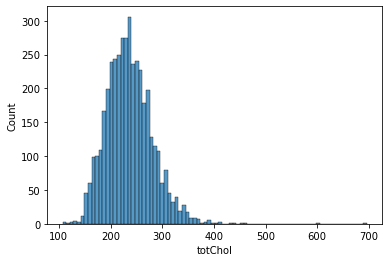

In [5]:
sns.histplot(dataset['totChol'])
print('Because the dataset is skewed we will use median')

In [6]:
totChol_median=dataset['totChol'].median()
dataset['totChol'].fillna(totChol_median, inplace=True)

Because the dataset is skewed we will use median


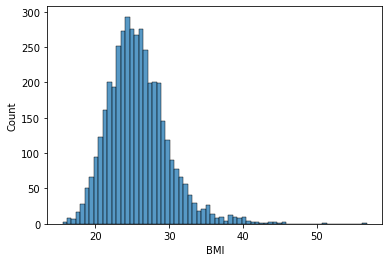

In [7]:
sns.histplot(dataset['BMI'])
print('Because the dataset is skewed we will use median')

In [8]:
BMI_median=dataset['BMI'].median()
dataset['BMI'].fillna(BMI_median, inplace=True)

Because the dataset is skewed we will use median


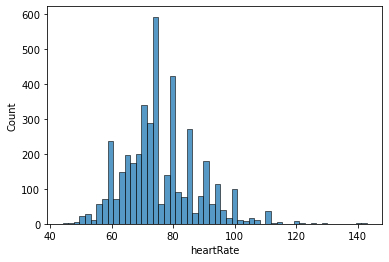

In [9]:
sns.histplot(dataset['heartRate'])
print('Because the dataset is skewed we will use median')

In [10]:
heartRate_median=dataset['heartRate'].median()
dataset['heartRate'].fillna(heartRate_median, inplace=True)

Because the dataset is skewed we will use median


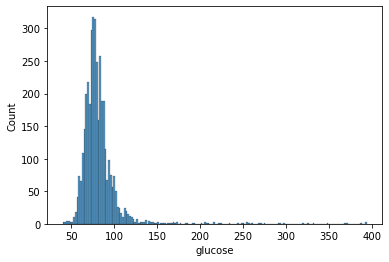

In [11]:
sns.histplot(dataset['glucose'])
print('Because the dataset is skewed we will use median')

In [12]:
glucose_median=dataset['glucose'].median()
dataset['glucose'].fillna(glucose_median, inplace=True)

In [13]:
dataset.isnull().sum()

male             0
age              0
currentSmoker    0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
TenYearCHD       0
dtype: int64

### Create independent and dependent variables to predict 

In [14]:
dataset.columns

Index(['male', 'age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [15]:
X=dataset[['male', 'age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose']]
y=dataset[['TenYearCHD']]

In [16]:
X = pd.get_dummies(dataset[['male', 'age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose']],
              drop_first=True)
X.head()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,285.0,130.0,84.0,23.10,85.0,85.0


## Splitting the dataset into the Training set and Test set

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                             test_size=.20,
                                             random_state=58)

## Training the Logistic Regression model 

In [18]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=1000)
classifier.fit(X_train.values, y_train.values.ravel())

LogisticRegression(max_iter=1000)

## Predicting a new result
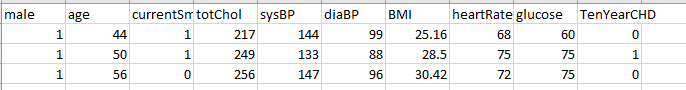

 ##### 10 year risk of coronary heart disease CHD 
  - "1” means “Yes”
  - “0” means “No”

In [19]:
print(classifier.predict([[1,44,1,217,144,99,25.16,68,60]]))

[0]


In [20]:
print(classifier.predict([[1,50,1,249,133,88,28.5,75,75]]))

[0]


In [21]:
print(classifier.predict([[1,56,0,256,147,96,30.42,72,75]]))

[0]


### Confusion matrix, Confusion matrix display and classification report

In [22]:
y_pred=classifier.predict(X_test.values)

In [26]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[724   7]
 [111   5]]


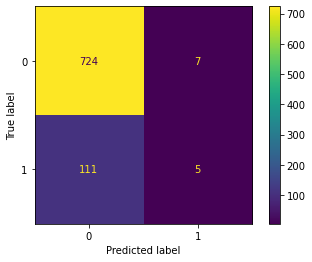

In [27]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=classifier.classes_)
disp.plot()
plt.show()

### Discuss the results

In [30]:
print(f'Accuracy score is: {accuracy_score(y_test,y_pred)}') 
print("From this function we see that our predictions are approximately 86% accurate.")

Accuracy score is: 0.8606847697756789
From this function we see that our predictions are approximately 86% accurate.


### My Results
- True Negative (Actual not at risk of Coronary Heart Disease (CHD) predicted not at risk)  724
- True Positive (Actual at risk of CHD predicted at risk)                                     5
- False Positive (Actual not at risk of CHD predicted at risk)                                7
- False Negative (Actual at risk of CHD predicted not at risk)                              111

### Summary

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       731
           1       0.42      0.04      0.08       116

    accuracy                           0.86       847
   macro avg       0.64      0.52      0.50       847
weighted avg       0.81      0.86      0.81       847



###### From this function we see a nice summary of how our model performed. Again we see our accuracy at 86%. We also see that our F1 score for the prediction of being not at risk ("0") was very close to 1 which is great; however this score for our prediction of being at risk ("1") is pretty far from 1, so it could be worth it to make some adjustments to our model to help improve the precision and recall.